In [58]:
# All necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
rawdata=pd.read_csv('drive/MyDrive/capstone-project2/BankChurners.csv')
rawdata.shape

(10127, 23)

### Data Exploration

In [6]:
rawdata.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [7]:
data=rawdata.iloc[:,1:-2]

In [8]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [10]:
data.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [11]:
data.Attrition_Flag.replace({'Existing Customer':0,'Attrited Customer':1},inplace=True)

In [12]:
data['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [13]:
# Number of dependents
data.Dependent_count.value_counts()

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64

In [14]:
data.Education_Level.value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [15]:
data.Marital_Status.value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [16]:
# Annual Income Category of the account holder 
data.Income_Category.value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [17]:
data.Card_Category.value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [18]:
# Total no. of products held by the customer
data.Total_Relationship_Count.value_counts()

3    2305
4    1912
5    1891
6    1866
2    1243
1     910
Name: Total_Relationship_Count, dtype: int64

In [19]:
# No. of months inactive in the last 12 months
data.Months_Inactive_12_mon.value_counts()

3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29
Name: Months_Inactive_12_mon, dtype: int64

In [20]:
# No. of Contacts in the last 12 months
data.Contacts_Count_12_mon.value_counts()

3    3380
2    3227
1    1499
4    1392
0     399
5     176
6      54
Name: Contacts_Count_12_mon, dtype: int64

In [21]:

NumericColumns=(data.select_dtypes(['int64','float64'])).columns
CategoricalColumns=(data.select_dtypes('object')).columns

In [22]:
NumericColumns

Index(['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [23]:
CategoricalColumns

Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

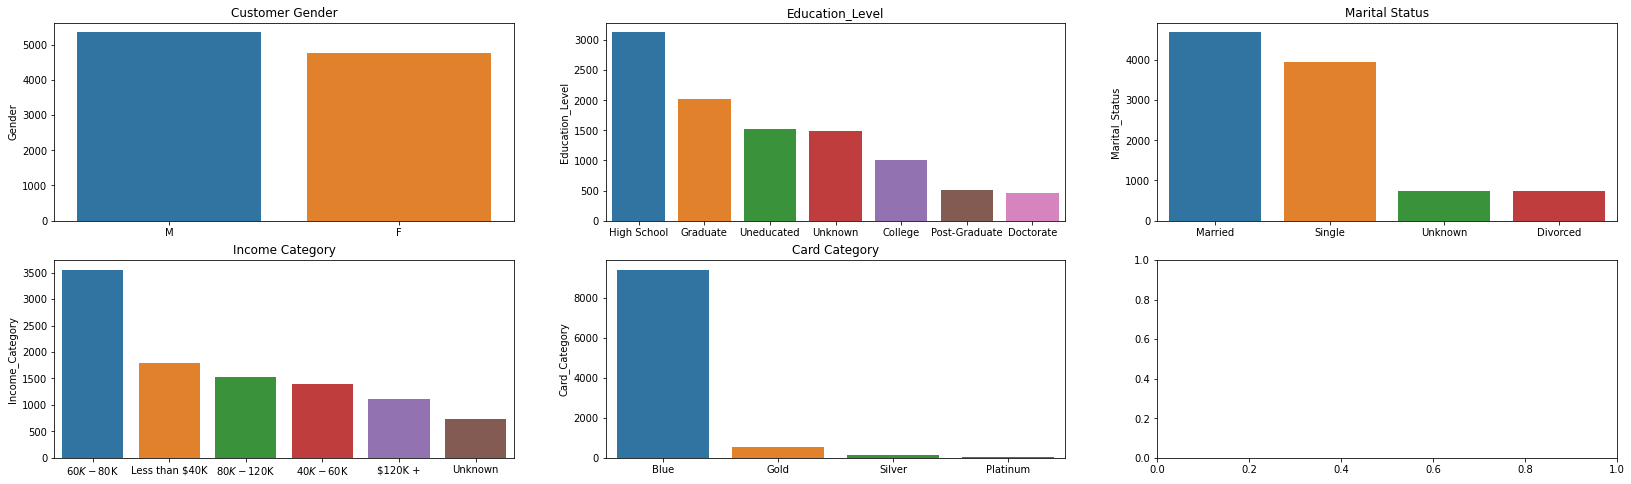

In [24]:
from numpy.lib.function_base import rot90

fig,ax=plt.subplots( 2,3,figsize=(28,8) )

sns.barplot(data.Gender.unique(),data.Gender.value_counts(),ax=ax[0,0])
sns.barplot(data.Education_Level.unique(),data.Education_Level.value_counts(),ax=ax[0,1]) 
sns.barplot(data.Marital_Status.unique(),data.Marital_Status.value_counts(),ax=ax[0,2])
sns.barplot(data.Income_Category.unique(),data.Income_Category.value_counts(),ax=ax[1,0])
sns.barplot(data.Card_Category.unique(),data.Card_Category.value_counts(),ax=ax[1,1])

ax[0,0].set_title('Customer Gender')
ax[0,1].set_title('Education_Level')
ax[0,2].set_title('Marital Status')
ax[1,0].set_title('Income Category')
ax[1,1].set_title('Card Category')
plt.show()

Text(0.5, 1.0, 'Average Card Utilization Ratio')

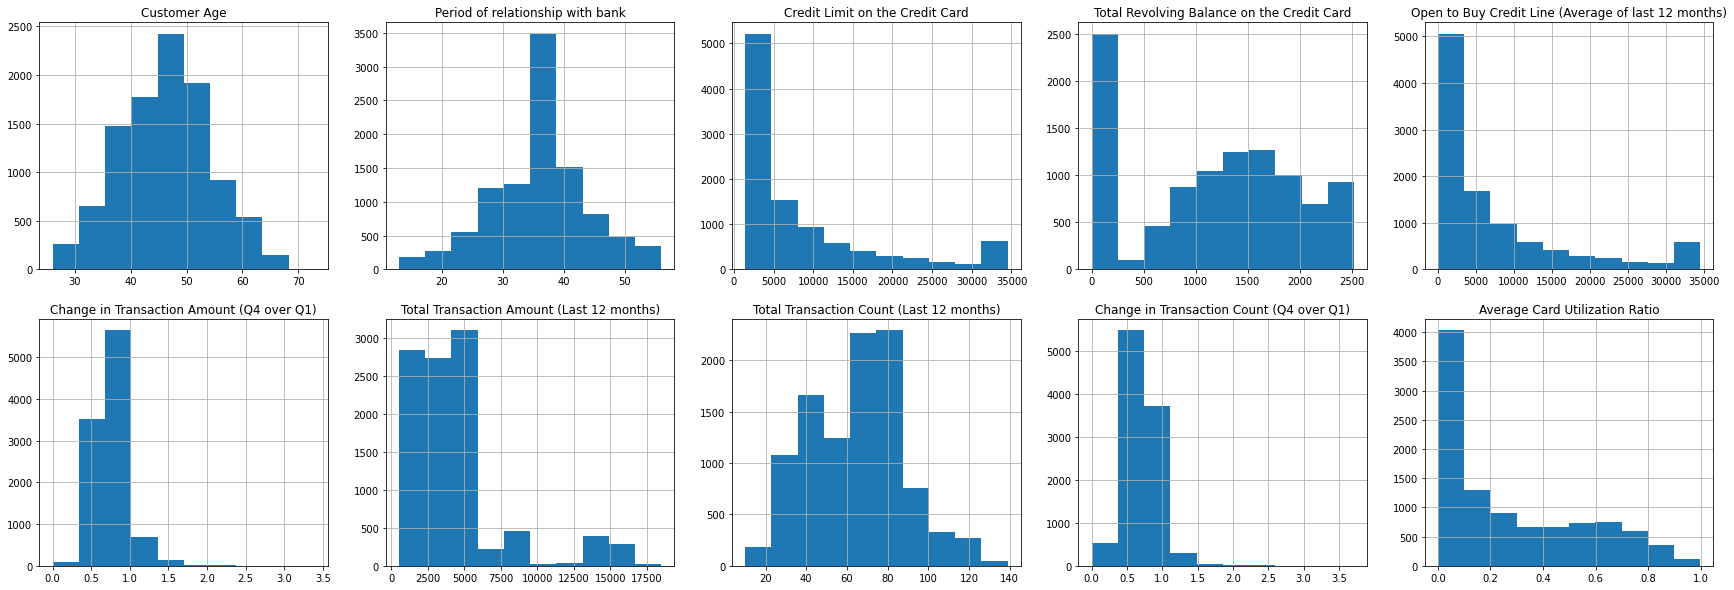

In [25]:
fig,ax=plt.subplots( 2,5,figsize=(30,10) )
data.Customer_Age.hist(ax=ax[0,0])
data.Months_on_book.hist(ax=ax[0,1]) 
data.Credit_Limit.hist(ax=ax[0,2])
data.Total_Revolving_Bal.hist(ax=ax[0,3])
data.Avg_Open_To_Buy.hist(ax=ax[0,4])
data.Total_Amt_Chng_Q4_Q1.hist(ax=ax[1,0])
data.Total_Trans_Amt.hist(ax=ax[1,1])
data.Total_Trans_Ct.hist(ax=ax[1,2])
data.Total_Ct_Chng_Q4_Q1.hist(ax=ax[1,3])
data.Avg_Utilization_Ratio.hist(ax=ax[1,4])
ax[0,0].set_title('Customer Age')
ax[0,1].set_title('Period of relationship with bank')
ax[0,2].set_title('Credit Limit on the Credit Card')
ax[0,3].set_title('Total Revolving Balance on the Credit Card')
ax[0,4].set_title('Open to Buy Credit Line (Average of last 12 months)')
ax[1,0].set_title('Change in Transaction Amount (Q4 over Q1)')
ax[1,1].set_title('Total Transaction Amount (Last 12 months)')
ax[1,2].set_title('Total Transaction Count (Last 12 months)')
ax[1,3].set_title('Change in Transaction Count (Q4 over Q1)')
ax[1,4].set_title('Average Card Utilization Ratio')

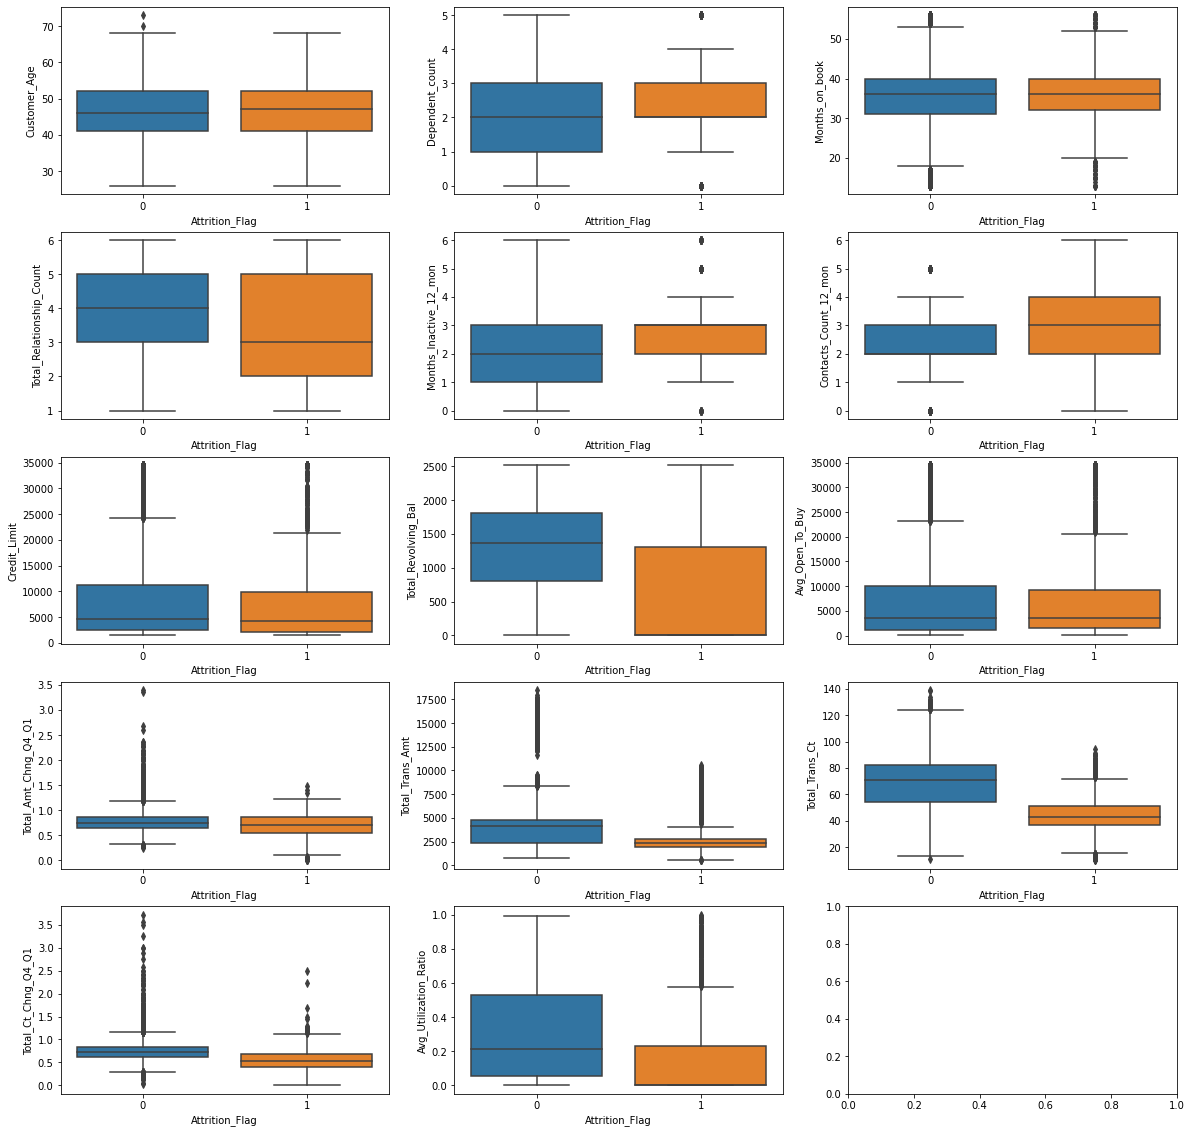

In [26]:
NumericColumns=(data.select_dtypes(['int64','float64'])).columns
cols=NumericColumns.drop('Attrition_Flag')
fig,ax=plt.subplots( 5,3,figsize=(20,20) )
i=0
j=0
for c in cols:
  sns.boxplot(data=data,y=c,x='Attrition_Flag',ax=ax[i,j])
  j=j+1
  if j>2:
    i=i+1
    j=0




In [27]:
abs(data.corr()['Attrition_Flag']).sort_values(ascending=False)

Attrition_Flag              1.000000
Total_Trans_Ct              0.371403
Total_Ct_Chng_Q4_Q1         0.290054
Total_Revolving_Bal         0.263053
Contacts_Count_12_mon       0.204491
Avg_Utilization_Ratio       0.178410
Total_Trans_Amt             0.168598
Months_Inactive_12_mon      0.152449
Total_Relationship_Count    0.150005
Total_Amt_Chng_Q4_Q1        0.131063
Credit_Limit                0.023873
Dependent_count             0.018991
Customer_Age                0.018203
Months_on_book              0.013687
Avg_Open_To_Buy             0.000285
Name: Attrition_Flag, dtype: float64

Feature 0: 4.845584
Feature 1: 0.408084
Feature 2: 1.237220
Feature 3: 0.658712
Feature 4: 2.410346


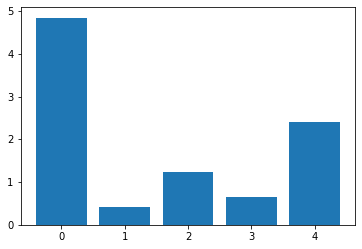

In [28]:
#Chi-Squared Feature Selection for categorical data:

X=data[CategoricalColumns]
y=data['Attrition_Flag']
X = X.astype(str)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# prepare input data
from sklearn.preprocessing import OrdinalEncoder
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

from sklearn.feature_selection import SelectKBest, chi2
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train_enc, y_train)
X_train_fs = fs.transform(X_train_enc)
X_test_fs = fs.transform(X_test_enc)

# what are the feature importance scores
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

CategoricalColumns :'Gender', 'Education_Level', 'Marital_Status', 'Income_Category','Card_Category'

Education_Level and Income_Category are least relevant features.

## Model performance of Dummy Classsifier as our baseline:

In [29]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
dummy=DummyClassifier(strategy='most_frequent')
dummy.fit(X_train,y_train)
dummy.score(X_test,y_test)

0.8366238894373149

## Random Forest

In [30]:
# Random Forest:
df=pd.concat([data[NumericColumns],pd.get_dummies(data[CategoricalColumns],drop_first=True)],axis=1)
X=df.drop(['Attrition_Flag'],axis=1)
y=df['Attrition_Flag']
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
RF= RandomForestClassifier(n_estimators=500,max_depth=4,random_state=1)
RF.fit(X_train,y_train)
RF.score(X_test,y_test)


0.8943731490621916

Not a very good result so we start to do more cleaning


## Cleaning Data

In [31]:
datana=data.replace('Unknown',np.nan)
datana.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [81]:
# drop least relevant features
dataset=datana.drop(columns=['Avg_Open_To_Buy','Education_Level','Income_Category'])

In [82]:
# missing values in Marital_Status  
for i in range (0,len(dataset.Marital_Status)):
  if pd.isnull(dataset.Marital_Status[i]):
    dataset.Marital_Status[i]=dataset.Marital_Status[i-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [83]:
dataset.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Marital_Status              0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

# SVM:

In [84]:

NumericColumns=(dataset.select_dtypes(['int64','float64'])).columns
CategoricalColumns=(dataset.select_dtypes(['object'])).columns
dataset=pd.concat([dataset[NumericColumns],pd.get_dummies(dataset[CategoricalColumns],drop_first=True)],axis=1)
X=dataset.drop(['Attrition_Flag'],axis=1)
y=dataset['Attrition_Flag']
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
svc= SVC(random_state=1)
svc.fit(X_train,y_train)
svc.score(X_test,y_test)

0.8366238894373149

# KNN

In [86]:

knn= KNeighborsClassifier( n_neighbors=5)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8909180651530109

# Random Forest:

In [38]:
# Random Forest:
NumericColumns=(dataset.select_dtypes(['int64','float64'])).columns
CategoricalColumns=(dataset.select_dtypes(['object'])).columns
dataset=pd.concat([dataset[NumericColumns],pd.get_dummies(dataset[CategoricalColumns],drop_first=True)],axis=1)
X=dataset.drop(['Attrition_Flag'],axis=1)
y=dataset['Attrition_Flag']
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
RF= RandomForestClassifier(n_estimators=500,max_depth=4,random_state=1)
RF.fit(X_train,y_train)
RF.score(X_test,y_test)

0.9057255676209279

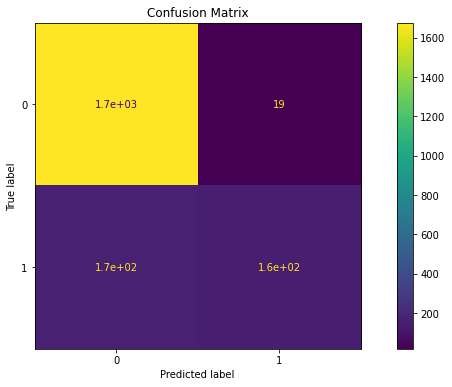

Accuracy : 0.9057255676209279
Precision : 0.9069264069264069
Recall : 0.9887905604719764


In [57]:
cfm = confusion_matrix(y_test, RF.predict(X_test))

TP = cfm[0][0]
FN = cfm[0][1]
FP = cfm[1][0]
TN = cfm[1][1]

fig, ax = plt.subplots(figsize=(13, 6))
plt.title("Confusion Matrix")
plot_confusion_matrix(RF, X_test, y_test, ax=ax)
plt.show()
print("Accuracy :", (TP+TN)/(TP+TN+FP+FN))
print("Precision :", (TP)/(TP+FP))
print("Recall :", (TP)/(TP+FN))


# Gradient Boosting

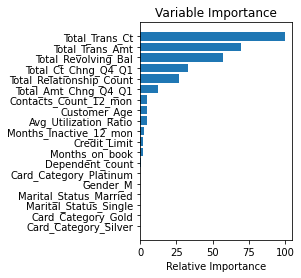

In [70]:
# Gradient Boosting
params={'n_estimators':500, 'max_depth':3,'loss':'exponential','random_state':1}
clf=GradientBoostingClassifier(**params )
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)
cm = confusion_matrix(y_test, predict_test)
feature_importance=clf.feature_importances_
feature_importance=100.0*(feature_importance/feature_importance.max())
sorted_idx=np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+0.5
plt.subplot(1,2,2)
plt.barh(pos,feature_importance[sorted_idx],align='center')
plt.yticks(pos,X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

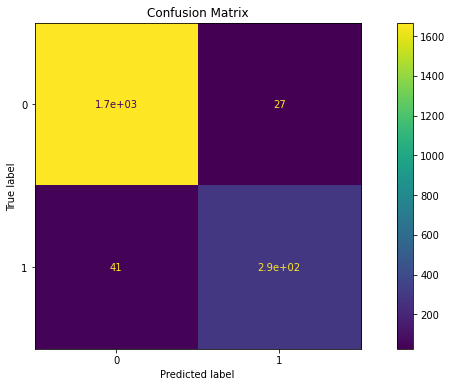

Accuracy : 0.9664363277393879
Precision : 0.976009362200117
Recall : 0.984070796460177


In [71]:
TP = cm[0][0]
FN = cm[0][1]
FP = cm[1][0]
TN = cm[1][1]

fig, ax = plt.subplots(figsize=(13, 6))
plt.title("Confusion Matrix")
plot_confusion_matrix(clf, X_test, y_test, ax=ax)
plt.show()
print("Accuracy :", (TP+TN)/(TP+TN+FP+FN))
print("Precision :", (TP)/(TP+FP))
print("Recall :", (TP)/(TP+FN))


In [72]:
clf.score(X_test,y_test)

0.9664363277393879

In [75]:
# Applying Cross Validation
acuracy=cross_val_score(clf,X_train,y_train,cv=10)
acuracy

array([0.96794081, 0.96419753, 0.96790123, 0.97901235, 0.98271605,
       0.98395062, 0.96666667, 0.9691358 , 0.97037037, 0.97530864])

In [78]:
acuracy.mean()

0.9727200073069369

By gradient boosting model we can predict if a customer will leave or not by acuracy of 97%
 